In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import signal

import h5py

In [2]:
%matplotlib notebook

In [3]:
%reload_ext autoreload
%autoreload 2

In [4]:
import sys
sys.path.append('../../nadavp/new_trap/PythonScripts/')
import BeadDataFile
from discharge_tools import *

## QPD alignment data

In [148]:
fname = '/data/new_trap/20190628/Bead1/InitialTest/Data{}.h5'
fnames = ['37', '44', '41'] ## feedback
# fnames = ['35', '36', '37'] ## tilt
# fnames = ['31', '34', '32']
files = [fname.format(ff_) for ff_ in fnames]

In [149]:
BDFs = [BeadDataFile.BeadDataFile(fname_) for fname_ in files]

<IPython.core.display.Javascript object>


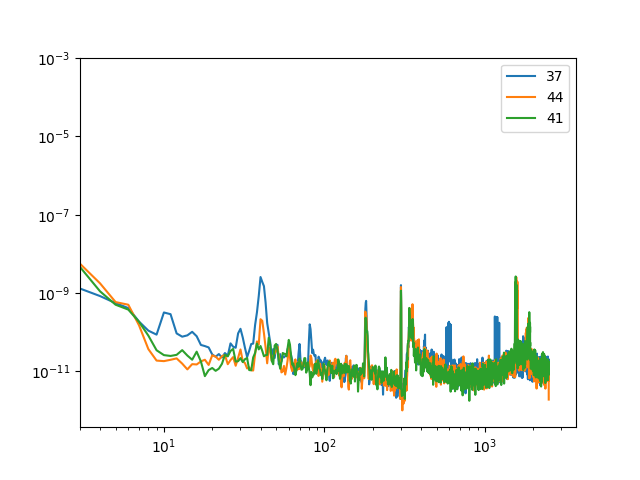

In [150]:
_,ax = plt.subplots()
# [ax[0].loglog(*BDF_.psd2('x'), label=t_) for BDF_,t_ in zip(BDFs,fnames)]
[ax.loglog(*BDF_.welch_psd('x', res = 5000), label=t_) for BDF_,t_ in zip(BDFs,fnames)]
ax.set(xlim=(3,None))
ax.legend()

## Dediacted tilit data

In [149]:
fname = '/data/new_trap/20190701/Bead2/InitialTest/Data{}.h5'
fname = '/home/data_transfer/data_from_windows/20190708/Bead2/Discharge/Discharge_{}.h5'
# fname = '/home/data_transfer/data_from_windows/20190708/Bead2/TransFunc/TransFuncY_10.h5'
fnames = ['34', '733', '785'] ## feedback
files = [fname.format(ff_) for ff_ in fnames]

In [145]:
BDFs = [BeadDataFile.BeadDataFile(fname_) for fname_ in files]

<IPython.core.display.Javascript object>


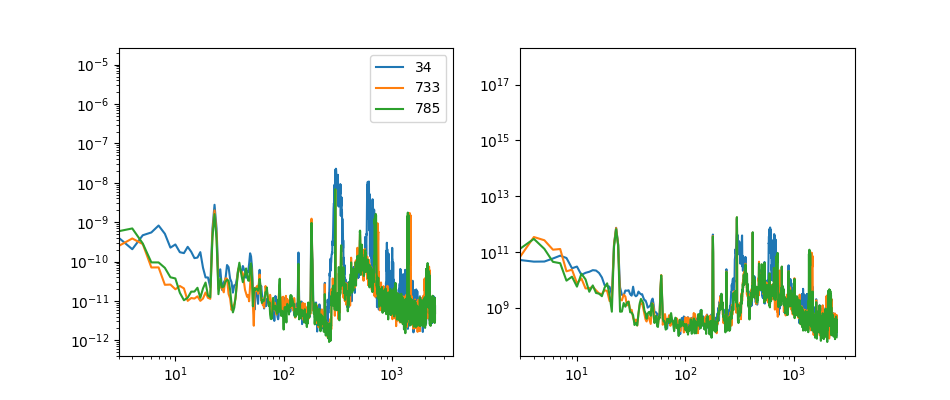

In [150]:
_,ax = plt.subplots(1,2,figsize=(9.5,4))
# [ax[0].loglog(*BDF_.psd2('x'), label=t_) for BDF_,t_ in zip(BDFs,fnames)]
[ax[0].loglog(*BDF_.welch_psd('x', res = 5000), label=t_) for BDF_,t_ in zip(BDFs,fnames)]
[ax[1].loglog(*BDF_.welch_psd('z', res = 5000), label=t_) for BDF_,t_ in zip(BDFs,fnames)]
[a.set(xlim=(3,None)) for a in ax]
ax[0].legend()

In [6]:
dis2 = load_dir(r'/home/data_transfer/data_from_windows/20190708/Bead2/Discharge/',max_file=730)

732  files in folder
730  files loaded


In [54]:
freq = 23
resX = [B.response_at_freq('z',drive_freq=freq) for B in dis2]
resX_n = [B.response_at_freq('z',drive_freq=freq+2) for B in dis2]

<IPython.core.display.Javascript object>


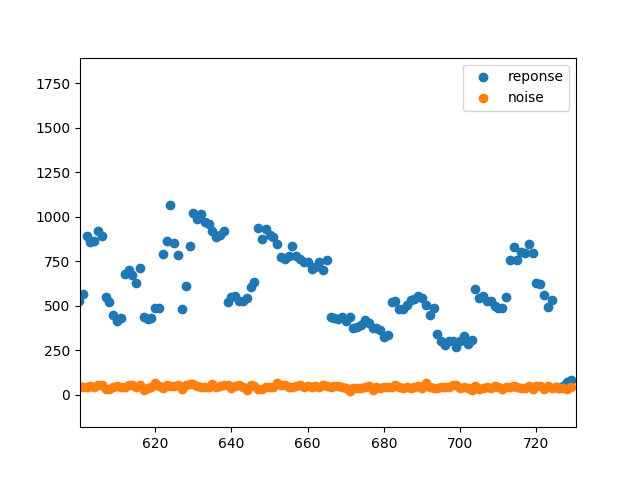

In [57]:
rrX = [np.std(r_) for r_ in resX]
rrX_n = [np.std(r_) for r_ in resX_n]
_,ax = plt.subplots()
ax.scatter(range(len(rrX)),rrX,label='reponse')
ax.scatter(range(len(rrX_n)),rrX_n,label='noise')
ax.set(xlim=(600,None))
ax.legend()

<IPython.core.display.Javascript object>


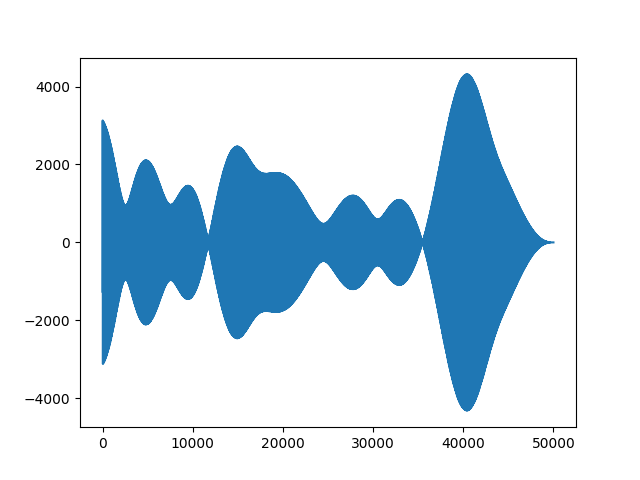

In [40]:
_,ax = plt.subplots()
pp = responses[0]
ax.plot(range(len(pp)),pp)